<a href="https://colab.research.google.com/github/GerryMasaka/BPP/blob/main/BPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
!pip install --upgrade pandas-datareader


In [ ]:
!pip install yfinance
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import pandas_datareader as web
import datetime as dt
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn import metrics
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
plt.style.use('fivethirtyeight')

In [ ]:
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime (2018,1,1)
end =  dt.datetime.now()


In [ ]:
#data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
#data = yf.download('BTC', start, end)
data = yf.download(tickers='BTC-USD', period = '700d', interval = '1d')


[*********************100%***********************]  1 of 1 completed


In [ ]:
#remove rows with missing values
data.dropna(inplace=True)

In [ ]:
print(data.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-20  36050.113281  36378.328125  33570.476562  35547.750000   
2021-01-21  35549.398438  35552.679688  30250.750000  30825.699219   
2021-01-22  30817.625000  33811.851562  28953.373047  33005.761719   
2021-01-23  32985.757812  33360.976562  31493.160156  32067.642578   
2021-01-24  32064.376953  32944.007812  31106.685547  32289.378906   

               Adj Close       Volume  
Date                                   
2021-01-20  35547.750000  66834573161  
2021-01-21  30825.699219  75643067688  
2021-01-22  33005.761719  77207272511  
2021-01-23  32067.642578  48354737975  
2021-01-24  32289.378906  48643830599  


In [ ]:
#training preparation

close_prices = data['Close']
values = close_prices.values 
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

prediction_days = 60
future_day = 1

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data) - future_day):
  x_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x + future_day, 0])


x_train, y_train = np.array(x_train), np.array(y_train)
#x_train, y_train = np.atleast_3d(x_train, y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(639, 60, 1)

In [ ]:
#test set preparation
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
#x_test= np.atleast_3d(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(140, 60, 1)

In [ ]:
#neural network
model = keras.Sequential()
model.add(LSTM(units= 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units= 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
20/20 [==============================] - 10s 147ms/step - loss: 0.0488
Epoch 2/40
20/20 [==============================] - 4s 189ms/step - loss: 0.0136
Epoch 3/40
20/20 [==============================] - 4s 201ms/step - loss: 0.0105
Epoch 4/40
20/20 [==============================] - 4s 184ms/step - loss: 0.0092
Epoch 5/40
20/20 [==============================] - 4s 204ms/step - loss: 0.0089
Epoch 6/40
20/20 [==============================] - 3s 169ms/step - loss: 0.0090
Epoch 7/40
20/20 [==============================] - 2s 98ms/step - loss: 0.0090
Epoch 8/40
20/20 [==============================] - 2s 97ms/step - loss: 0.0074
Epoch 9/40
20/20 [==============================] - 2s 95ms/step - loss: 0.0081
Epoch 10/40
20/20 [==============================] - 2s 98ms/step - loss: 0.0083
Epoch 11/40
20/20 [==============================] - 2s 96ms/step - loss: 0.0070
Epoch 12/40
20/20 [==============================] - 2s 96ms/step - loss: 0.0063
Epoch 13/40
20/20 [===========

In [ ]:
#loss_per_epoch = model.history.history['loss']
#plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
#model evaluation
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5/5 [==============================] - 2s 25ms/step


206.60532924107142

<ipython-input-65-7d8be21254e2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


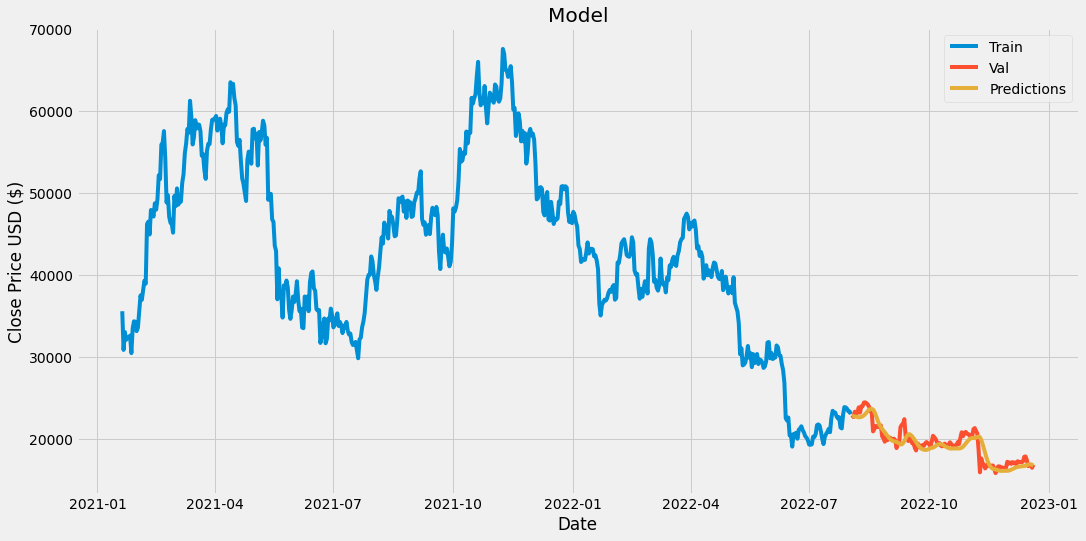

In [ ]:
data = data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
validation

,Close,Predictions
Date,,
2022-08-03,22846.507812,22685.501953
2022-08-04,22630.957031,22732.759766
2022-08-05,23289.314453,22711.390625
2022-08-06,22961.279297,22674.220703
2022-08-07,23175.890625,22629.474609
...,...,...
2022-12-16,16647.484375,16844.527344
2022-12-17,16795.091797,16873.259766
2022-12-18,16757.976562,16850.787109


In [ ]:
data = yf.download(tickers='BTC-USD', period = '700d', interval = '5d')
#[1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
close_prices = data.filter(['Close'])
last_60_days = close_prices[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 64ms/step
[[16736.81]]
